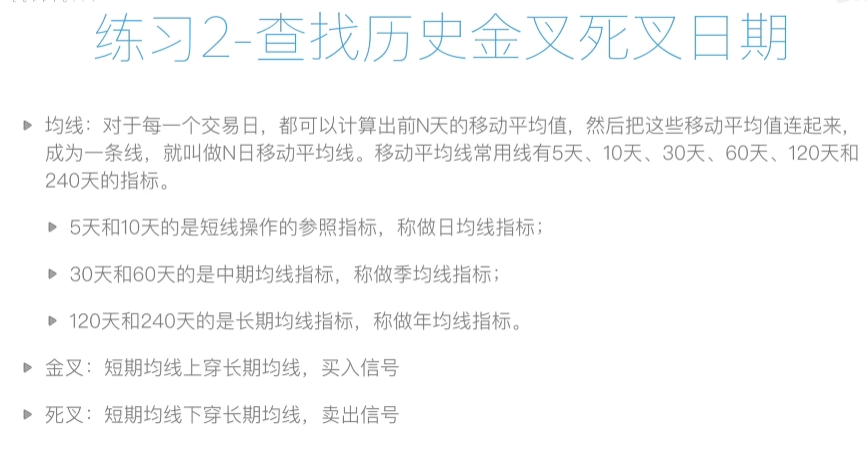
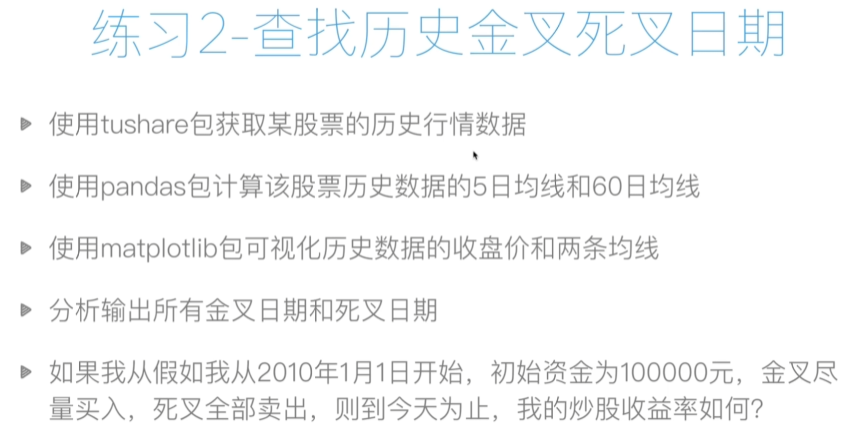

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Duplicate key in file PosixPath('/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 400 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('601318.csv', index_col = 'date', parse_dates=["date"])[["open", "close", "low", "high"]]
df

open   close     low    high
date                                      
2007-03-01  21.878  20.473  20.040  22.302
2007-03-02  20.565  20.307  20.075  20.758
2007-03-05  20.119  19.419  19.047  20.202
2007-03-06  19.253  19.800  19.143  20.128
2007-03-07  19.817  20.338  19.651  20.522
...            ...     ...     ...     ...
2017-12-11  71.200  73.250  70.820  73.310
2017-12-12  73.250  71.210  71.170  73.560
2017-12-13  71.210  72.120  70.200  72.620
2017-12-14  72.120  71.010  70.600  72.160
2017-12-15  70.690  70.380  70.050  71.440

[2563 rows x 4 columns]

### 使用pandas包计算该股票历史数据的5日均线和30日均线

`rolling`函数

In [5]:
df["ma5"] = df['close'].rolling(5).mean()
df["ma30"] = df['close'].rolling(30).mean()
df

open   close     low    high      ma5       ma30
date                                                          
2007-03-01  21.878  20.473  20.040  22.302      NaN        NaN
2007-03-02  20.565  20.307  20.075  20.758      NaN        NaN
2007-03-05  20.119  19.419  19.047  20.202      NaN        NaN
2007-03-06  19.253  19.800  19.143  20.128      NaN        NaN
2007-03-07  19.817  20.338  19.651  20.522  20.0674        NaN
...            ...     ...     ...     ...      ...        ...
2017-12-11  71.200  73.250  70.820  73.310  70.7960  70.198667
2017-12-12  73.250  71.210  71.170  73.560  70.7980  70.427000
2017-12-13  71.210  72.120  70.200  72.620  71.3420  70.693667
2017-12-14  72.120  71.010  70.600  72.160  71.8160  70.922667
2017-12-15  70.690  70.380  70.050  71.440  71.5940  71.120333

[2563 rows x 6 columns]

### 使用matplotlib包可视化历史数据的收盘价和两条均线

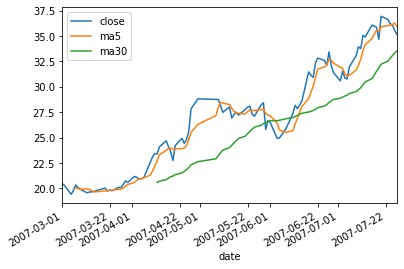

In [11]:
df[['close', 'ma5', 'ma30']][:100].plot()
plt.show()

### 分析输出所有金叉日期和死叉日期

In [13]:
df = df.dropna()
df = df['2010-01-01':]
df

open   close     low    high      ma5       ma30
date                                                          
2010-01-04  24.862  24.145  24.118  24.907  24.0392  25.085700
2010-01-05  24.208  24.450  23.661  24.732  24.2356  25.010600
2010-01-06  24.373  23.930  23.881  24.597  24.3316  24.925167
2010-01-07  23.925  23.486  23.240  24.109  24.1388  24.828833
2010-01-08  23.486  23.347  22.985  23.486  23.8716  24.704567
...            ...     ...     ...     ...      ...        ...
2017-12-11  71.200  73.250  70.820  73.310  70.7960  70.198667
2017-12-12  73.250  71.210  71.170  73.560  70.7980  70.427000
2017-12-13  71.210  72.120  70.200  72.620  71.3420  70.693667
2017-12-14  72.120  71.010  70.600  72.160  71.8160  70.922667
2017-12-15  70.690  70.380  70.050  71.440  71.5940  71.120333

[1880 rows x 6 columns]

In [14]:
sr1 = df['ma5'] < df['ma30']
sr2 = df['ma5'] >= df['ma30']

death_cross = df[sr1 & sr2.shift(1)].index
golden_cross = df[~(sr1 | sr2.shift(1))].index

In [18]:
death_cross

DatetimeIndex(['2010-04-29', '2010-11-16', '2010-12-20', '2011-02-23',
               '2011-03-17', '2011-05-05', '2011-07-21', '2011-11-21',
               '2012-03-09', '2012-06-05', '2012-07-27', '2012-09-17',
               '2012-10-29', '2013-02-25', '2013-04-24', '2013-05-13',
               '2013-10-09', '2013-10-17', '2013-12-23', '2014-01-28',
               '2014-05-19', '2014-06-25', '2014-08-26', '2014-09-15',
               '2015-02-02', '2015-05-18', '2015-06-02', '2015-06-18',
               '2015-12-01', '2015-12-10', '2016-01-05', '2016-04-12',
               '2016-05-06', '2016-06-27', '2016-08-08', '2016-09-29',
               '2016-12-20', '2017-03-02', '2017-04-13', '2017-08-11',
               '2017-09-20', '2017-12-07'],
              dtype='datetime64[ns]', name='date', freq=None)

In [24]:
first_money = 100000
money = first_money
hold = 0#持有多少股
sr1 = pd.Series(1, index=golden_cross)
sr2 = pd.Series(0, index=death_cross)
sr = sr1.append(sr2).sort_index()

for i in range(0, len(sr)):
    p = df['open'][sr.index[i]]
    if sr.iloc[i] == 1:
        #金叉
        buy = (money // (100 * p))
        hold += buy*100
        money -= buy*100*p
    else:
        money += hold * p
        hold = 0

p = df['open'][-1]
now_money = hold * p + money

print(now_money - first_money)

452451.69999999995
